In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

C:\Users\ashish.sharma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
amazon_df= pd.read_csv('amazon_reviews.csv')

In [3]:
amazon_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
amazon_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
amazon_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [8]:
# Drop the 'id' column
amazon_df = amazon_df.drop(['rating'], axis=1)

<AxesSubplot:>

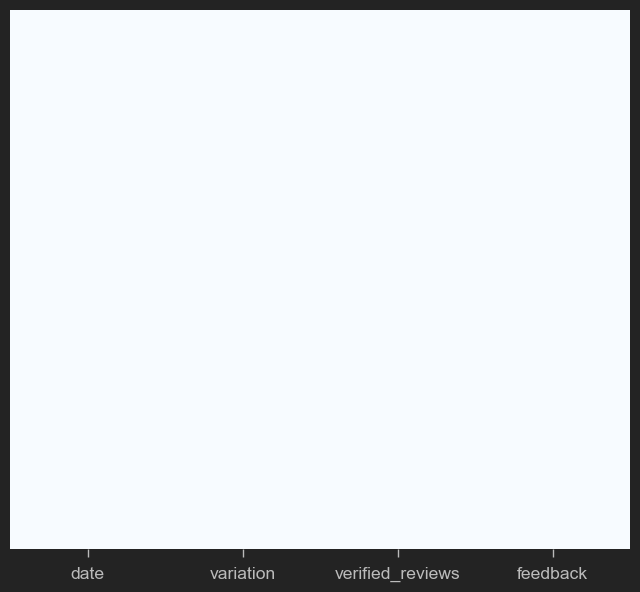

In [9]:
#EDA

sns.heatmap(amazon_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'feedback'}>]], dtype=object)

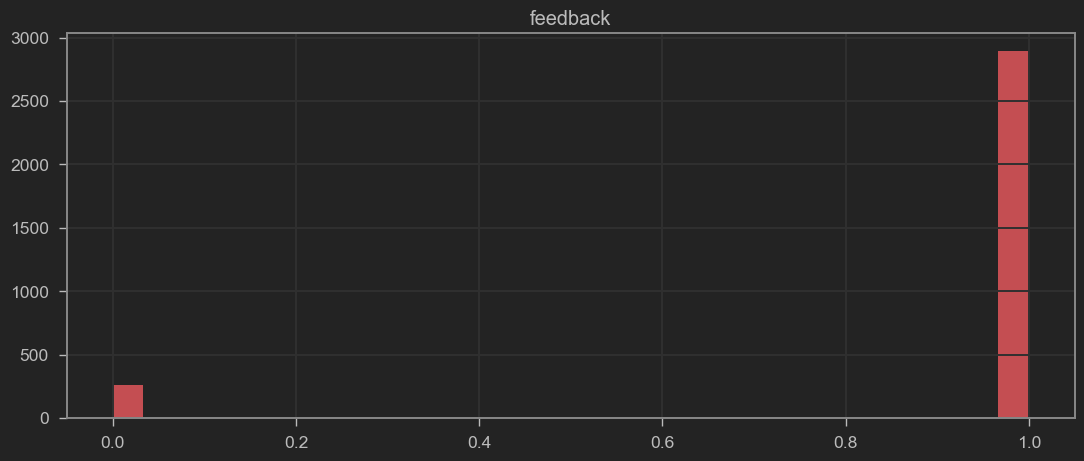

In [10]:
# Plot the histogram
amazon_df.hist(bins=30, figsize=(13,5), color='r')

C:\Users\ashish.sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

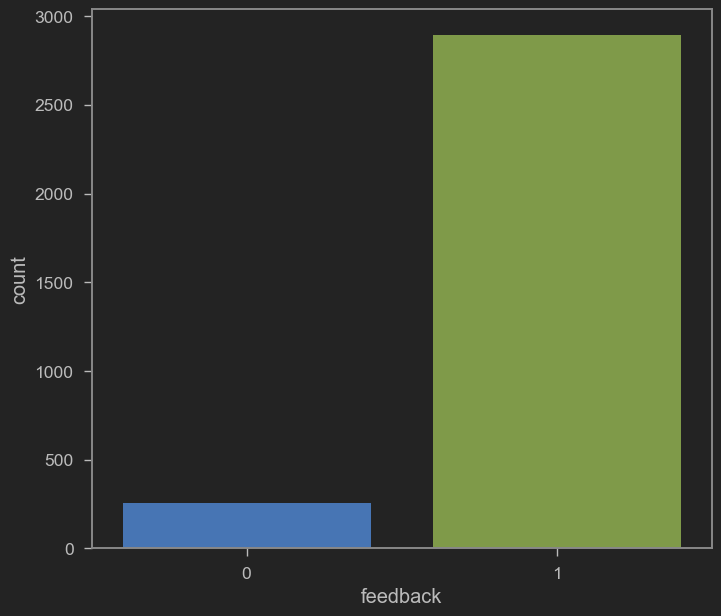

In [11]:
# Plot countplot
sns.countplot(amazon_df['feedback'], label= 'Count')

In [13]:
# Let's get the length of the messages
amazon_df['length']=amazon_df['verified_reviews'].apply(len)

In [14]:
amazon_df

,date,variation,verified_reviews,feedback,length
0,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [16]:
amazon_df.describe()

,feedback,length
count,3150.000000,3150.000000
mean,0.918413,132.049524
std,0.273778,182.099952
min,0.000000,1.000000
25%,1.000000,30.000000
50%,1.000000,74.000000
75%,1.000000,165.000000
max,1.000000,2851.000000


In [17]:
# Let's view the shortest message 
amazon_df[amazon_df['length']==1]['verified_reviews']

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

In [18]:
amazon_df[amazon_df['length']==132]['verified_reviews']

570     Nice. It works good.Some times is not easy to ...
1655    awesome product! I am in the process of having...
1705    If you belong to amazon prime, I would think t...
2321    I expected to have access to more current movi...
2483    Works good for the most part. You ask it some ...
2834    Works good for the most part. You ask it some ...
Name: verified_reviews, dtype: object

<AxesSubplot:ylabel='Frequency'>

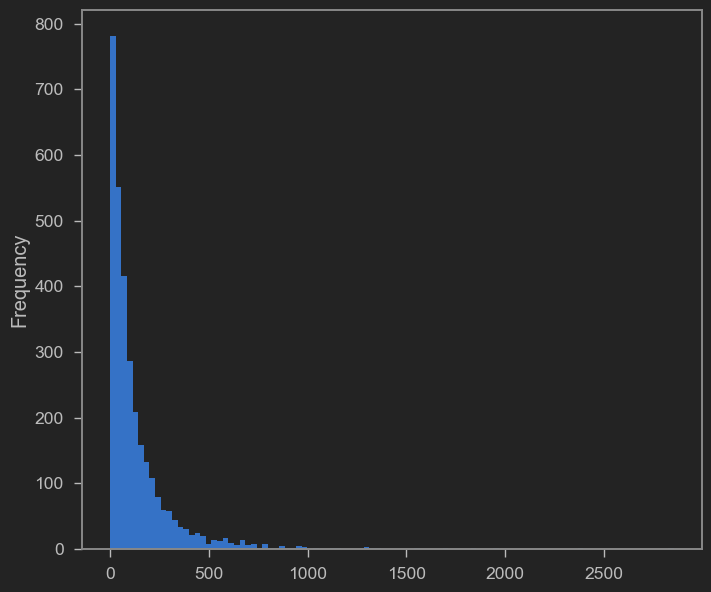

In [19]:
# Plot the histogram of the length column
amazon_df['length'].plot(bins=100, kind='hist')

In [20]:
positive = amazon_df[amazon_df['feedback']==1]
positive

,date,variation,verified_reviews,feedback,length
0,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [21]:
negative = amazon_df[amazon_df['feedback']==0]
negative

,date,variation,verified_reviews,feedback,length
46,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,30-Jul-18,Black Dot,I didn’t order it,0,17


In [22]:
sentences = amazon_df['verified_reviews'].tolist()
len(sentences)

3150

In [23]:
sentences_as_one_string =" ".join(sentences)

In [24]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [25]:
!pip install wordcloud

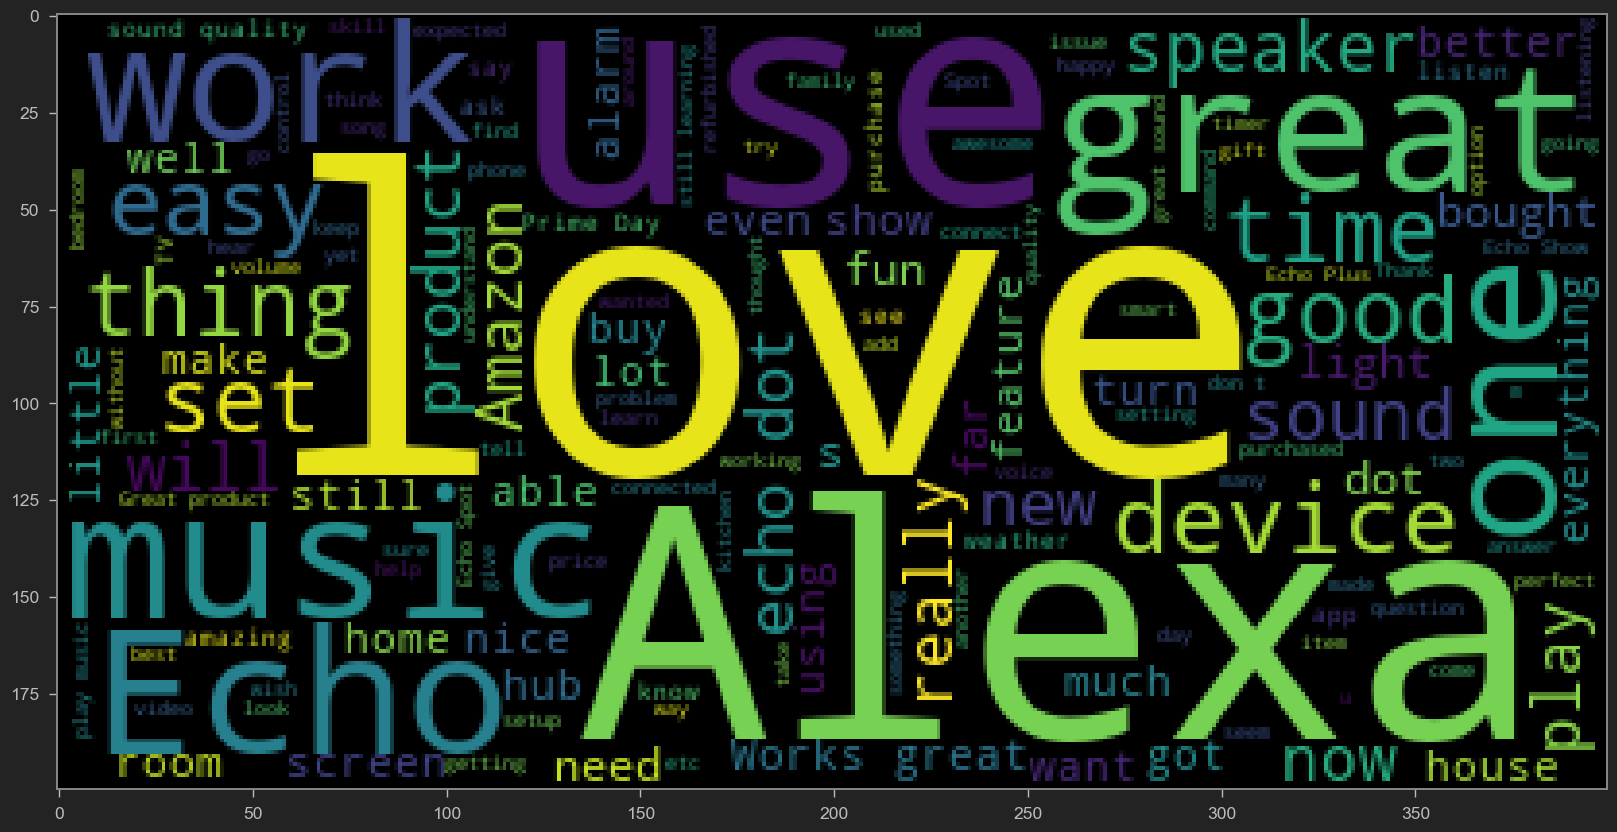

In [26]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

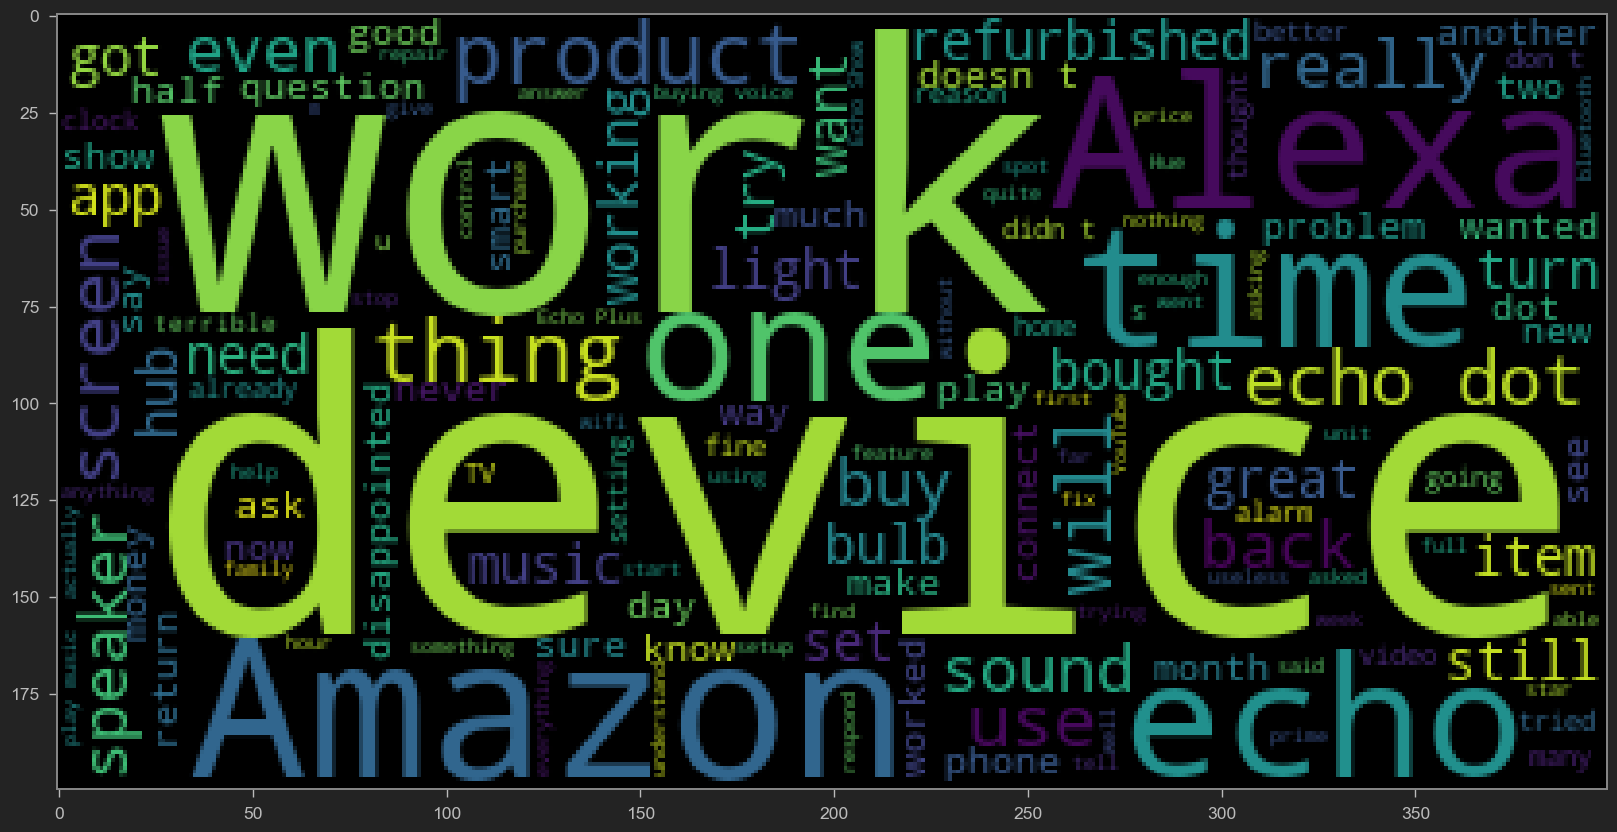

In [27]:
negative_list=negative['verified_reviews'].tolist()

negative_sentences_one_string= " ".join(negative_list)

plt.figure(figsize=(20,20))

plt.imshow(WordCloud().generate(negative_sentences_one_string))

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

#  download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashish.sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [31]:
# Let's test the newly added function
amazon_df_clean = amazon_df['verified_reviews'].apply(message_cleaning)

In [32]:
print(amazon_df_clean[5]) # show the cleaned up version

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [34]:
print(amazon_df['verified_reviews'][5]) # show the original version

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
amazon_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [36]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

C:\Users\ashish.sharma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
print(amazon_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
amazon_countvectorizer.shape

(3150, 5211)

In [39]:
X = pd.DataFrame(amazon_countvectorizer.toarray())

In [40]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y=amazon_df['feedback']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.naive_bayes import MultinomialNB

NB_Classifier=MultinomialNB()

NB_Classifier.fit(X_train, y_train)

MultinomialNB()

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

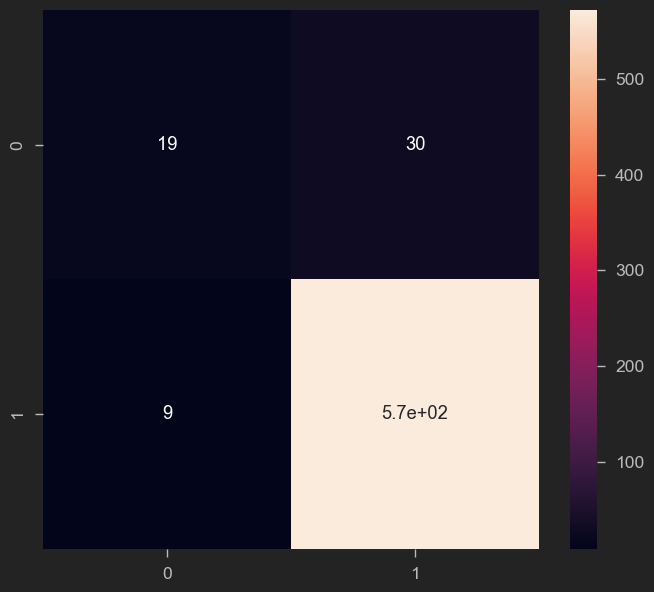

In [45]:
# Predicting the Test set results
y_predict_test = NB_Classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49        49
           1       0.95      0.98      0.97       581

    accuracy                           0.94       630
   macro avg       0.81      0.69      0.73       630
weighted avg       0.93      0.94      0.93       630

